# Exploring "Semantic" Wikipedia Queries

This notebook sets out to explore performing semantic searches against Wikipedia datasets.

In [4]:
import pandas as pd

In [2]:
# Load and explore the simple vector database
big_wikipedia_df = pd.read_csv("wikipedia_vector_database/vector_database_wikipedia_articles_embedded.csv")

In [3]:
big_wikipedia_df.head()

,id,url,title,text,title_vector,content_vector,vector_id
0,1,https://simple.wikipedia.org/wiki/April,April,April is the fourth month of the year in the J...,"[0.001009464613161981, -0.020700545981526375, ...","[-0.011253940872848034, -0.013491976074874401,...",0
1,2,https://simple.wikipedia.org/wiki/August,August,August (Aug.) is the eighth month of the year ...,"[0.0009286514250561595, 0.000820168002974242, ...","[0.0003609954728744924, 0.007262262050062418, ...",1
2,6,https://simple.wikipedia.org/wiki/Art,Art,Art is a creative activity that expresses imag...,"[0.003393713850528002, 0.0061537534929811954, ...","[-0.004959689453244209, 0.015772193670272827, ...",2
3,8,https://simple.wikipedia.org/wiki/A,A,A or a is the first letter of the English alph...,"[0.0153952119871974, -0.013759135268628597, 0....","[0.024894846603274345, -0.022186409682035446, ...",3
4,9,https://simple.wikipedia.org/wiki/Air,Air,Air refers to the Earth's atmosphere. Air is a...,"[0.02224554680287838, -0.02044147066771984, -0...","[0.021524671465158463, 0.018522677943110466, -...",4


In [4]:
print(f"There are {len(big_wikipedia_df)} articles in this set.")

There are 25000 articles in this set.


In [6]:
print(f"Here is an example title - {big_wikipedia_df.iloc[0]['title']} - and text:\n{big_wikipedia_df.iloc[0]['text']}")

Here is an example title - April - and text:
April is the fourth month of the year in the Julian and Gregorian calendars, and comes between March and May. It is one of four months to have 30 days.

April always begins on the same day of week as July, and additionally, January in leap years. April always ends on the same day of the week as December.

April's flowers are the Sweet Pea and Daisy. Its birthstone is the diamond. The meaning of the diamond is innocence.

The Month 

April comes between March and May, making it the fourth month of the year. It also comes first in the year out of the four months that have 30 days, as June, September and November are later in the year.

April begins on the same day of the week as July every year and on the same day of the week as January in leap years. April ends on the same day of the week as December every year, as each other's last days are exactly 35 weeks (245 days) apart.

In common years, April starts on the same day of the week as Octob

In [8]:
print(big_wikipedia_df.dtypes)

id                 int64
url               object
title             object
text              object
title_vector      object
content_vector    object
vector_id          int64
dtype: object


In [11]:
big_wikipedia_df.iloc[0]['content_vector'][0:100]

'[-0.011253940872848034, -0.013491976074874401, -0.016845842823386192, -0.03943023830652237, -0.01289'

We need to convert the vector columns into numpy arrays. At the moment they are strings.

The code below might take a while as there are 25000 and each vector is fairly big.

In [12]:
import numpy as np
from ast import literal_eval

df = big_wikipedia_df

# Convert strings to lists
df['title_vector'] = df['title_vector'].apply(literal_eval)
df['content_vector'] = df['content_vector'].apply(literal_eval)

# And then to numpy arrays
df['title_vector'] = df['title_vector'].apply(np.array)
df['content_vector'] = df['content_vector'].apply(np.array)

In [13]:
print(f"There is a vector for the title and the content. There are of length {len(big_wikipedia_df.iloc[0]['content_vector'])}.")

There is a vector for the title and the content. There are of length 1536.


In [14]:
# Let's save this to a pickle to use later
df.to_pickle("wikipedia_vector_database/big_df.pkl")

In [8]:
# Let's have a play with a few claims
page_rank = """1. A computer implemented method of scoring a plurality of linked documents, comprising:
obtaining a plurality of documents, at least some of the documents being linked documents, at least some of the documents being linking documents, and at least some of the documents being both linked documents and linking documents, each of the linked documents being pointed to by a link in one or more of the linking documents;
assigning a score to each of the linked documents based on scores of the one or more linking documents and
processing the linked documents according to their scores."""
dyson_vac = """1. A vacuum cleaning device convertible alternately, into an upright cleaning appliance and into a cylindrical tank type appliance, said appliance comprising a suction head adapted to be moved over a surface to be cleaned when the appliance is in its upright mode, a first housing having one end pivotally connected to said suction head and having an opposite end, a second housing having a first end fixed to said opposite end of the first housing, a pair of frusto-conically shaped cyclones disposed side by side and enclosed by said second housing, each of said cyclones having a first open end facing said first housing and a larger opposite end, a flexible hose connecting said suction head with one of said frusto-conical cylones for flow of air into the said frusto-conical cyclone, means connecting said side-by-side cyclones for flow of air therebetween, a motor and fan assembly disposed in said first housing for sucking air into said suction head and into said flexible hose, means disposed above each of said first open ends of the frusto-conically shaped cyclones within the said second housing comprising an inverted conically shaped member disposed above the smaller open end of each of the cyclones with its apex facing said smaller open end to interrupt flow of air through the said smaller open end and intercept suspended solids in the air, means comprising third and fourth housings disposed around the cyclones for directing intercepted solids falling from the air towards the first suction head and into a receptacle therefor, means on the first housing for rollably supporting the appliance in its upright mode, and a rotary brush supported across said suction head to contact said surface as the appliance in its upright mode is moved over the surface to be cleaned,
means for moving the applicance in its upright mode comprising a pair of wheels rotatably mounted on said first housing;
means fixed to said second housing for lifting and moving the appliance while in its cylindrical tank type mode."""

In [5]:
df = pd.read_pickle("wikipedia_vector_database/big_df.pkl")

In [6]:
from logic.embedding_search import run_similarity_query

In [14]:
df_results = run_similarity_query(df, query_text=page_rank, embedding_column="content_vector", n=20, pprint=False)

In [15]:
df_results.head(20)

,id,url,title,text,title_vector,content_vector,vector_id,similarities
10350,36352,https://simple.wikipedia.org/wiki/Score,Score,"Score or scorer may refer to:\n\nTest score, t...","[-0.004343661013990641, -0.0018683740636333823...","[-0.020761657506227493, -0.00769726000726223, ...",10350,0.785993
17541,66390,https://simple.wikipedia.org/wiki/Distributed%...,Distributed computing,Distributed computing is a word from computer ...,"[-0.03615354001522064, -0.010982765816152096, ...","[-0.012675154954195023, 0.00638987310230732, 0...",17541,0.783493
19025,71721,https://simple.wikipedia.org/wiki/Digital%20Ob...,Digital Object Identifier,A Digital Object Identifier (or DOI) is a perm...,"[-0.04034573212265968, 0.0025731036439538, -0....","[-0.02219858206808567, 0.01776399277150631, 0....",19025,0.777423
395,811,https://simple.wikipedia.org/wiki/Summary,Summary,A summary is a condensed explanation of an eve...,"[-0.00768565246835351, -0.007761816494166851, ...","[-0.027342326939105988, 0.018096890300512314, ...",395,0.775874
4026,12379,https://simple.wikipedia.org/wiki/Peer%20review,Peer review,Peer review is a process used when publishing ...,"[-0.005475636571645737, -0.013197178021073341,...","[0.004468054510653019, 0.010757273063063622, -...",4026,0.774794
229,445,https://simple.wikipedia.org/wiki/Link,Link,"A link, also hyperlink in computing, is a part...","[-0.001266455976292491, 0.0054137795232236385,...","[0.0020148337353020906, 0.011485341936349869, ...",229,0.774092
13565,49978,https://simple.wikipedia.org/wiki/Sorting%20al...,Sorting algorithm,A sorting algorithm is an algorithm that puts ...,"[-0.006600311025977135, 0.002704123267903924, ...","[-0.014325588941574097, 0.014938797801733017, ...",13565,0.774064
11216,40613,https://simple.wikipedia.org/wiki/Natural%20la...,Natural language processing,Natural Language Processing (NLP) is a field i...,"[-0.02166258543729782, 0.016097407788038254, 0...","[-0.0004674163938034326, 0.0028920648619532585...",11216,0.773191
20078,76829,https://simple.wikipedia.org/wiki/Document,Document,A document (noun) is a piece of information th...,"[-0.00245147617533803, -0.004188503138720989, ...","[-0.017560631036758423, 0.018610380589962006, ...",20078,0.770822
381,774,https://simple.wikipedia.org/wiki/Search%20engine,Search engine,A search engine is a website that allows users...,"[-0.030524959787726402, -0.001011005020700395,...","[-0.0008919621468521655, 0.014962960034608841,...",381,0.767659


With this simple dataset it looks like N=10 is a good cutoff for that example. We go a bit of piste with results 10-20.

In [16]:
df_results.columns.values.tolist()

['id',
 'url',
 'title',
 'text',
 'title_vector',
 'content_vector',
 'vector_id',
 'similarities']

In [17]:
df_results_vac = run_similarity_query(df, query_text=dyson_vac, embedding_column="content_vector", n=20, pprint=False)

In [18]:
df_results_vac.head(20)

,id,url,title,text,title_vector,content_vector,vector_id,similarities
16287,62643,https://simple.wikipedia.org/wiki/Vacuum%20cle...,Vacuum cleaner,A vacuum cleaner is a device that cleans dust ...,"[-0.012701351195573807, -0.0033276129979640245...","[-0.015313845127820969, 0.02101406827569008, 0...",16287,0.865383
17250,65301,https://simple.wikipedia.org/wiki/Aspirator,Aspirator,"An aspirator is a device that makes vacuum, be...","[-0.04094366729259491, 0.004380113445222378, 0...","[-0.030932700261473656, 0.024010788649320602, ...",17250,0.820474
3631,11026,https://simple.wikipedia.org/wiki/Vacuum,Vacuum,"A vacuum is a place where there is no matter, ...","[-0.008425381034612656, -0.005103836767375469,...","[0.00443929573521018, 0.015256890095770359, 0....",3631,0.796920
17238,65263,https://simple.wikipedia.org/wiki/B%C3%BCchner...,Büchner flask,"A Büchner flask (also called a vacuum flask, a...","[-0.031481459736824036, -0.011366757564246655,...","[-0.01811506412923336, 0.013121290132403374, 0...",17238,0.796878
17231,65252,https://simple.wikipedia.org/wiki/B%C3%BCchner...,Büchner funnel,A büchner funnel is a piece of laboratory equi...,"[-0.02049623802304268, -0.012520802207291126, ...","[-0.015194620005786419, 0.013920578174293041, ...",17231,0.796231
16093,61813,https://simple.wikipedia.org/wiki/Mop,Mop,A mop is a tool used for cleaning. It is usual...,"[-0.003893297165632248, -0.02787063829600811, ...","[-0.00048493759823031723, -0.00601211050525307...",16093,0.793167
11843,43405,https://simple.wikipedia.org/wiki/Washing%20ma...,Washing machine,A washing machine is a machine that washes dir...,"[-0.022537516430020332, -0.004262391943484545,...","[0.004534857347607613, 0.007109383586794138, -...",11843,0.791947
969,3861,https://simple.wikipedia.org/wiki/Plunger,Plunger,A plunger is a tool. It is used to get rid of ...,"[-0.03056960366666317, -0.0057854317128658295,...","[-0.01968190260231495, 0.004058258142322302, 0...",969,0.789070
17024,64647,https://simple.wikipedia.org/wiki/Vortex%20mixer,Vortex mixer,A vortex mixer is small machine used in labora...,"[-0.01813584566116333, -0.0049390229396522045,...","[-0.03248820826411247, 0.011730395257472992, -...",17024,0.788369
19040,71902,https://simple.wikipedia.org/wiki/Feather%20du...,Feather duster,A feather duster is a tool used for cleaning. ...,"[-0.030931077897548676, 0.010254903696477413, ...","[-0.021696381270885468, 0.018342094495892525, ...",19040,0.787259


This second example it's even the top 3.

But in general these do seem relevant background to the claim in question.

## Titles

I wonder what results we get if we just search the titles...

We can use ChatGPT to give us one term summaries of the claims...

The GPT-3.5 model is good enough for that.

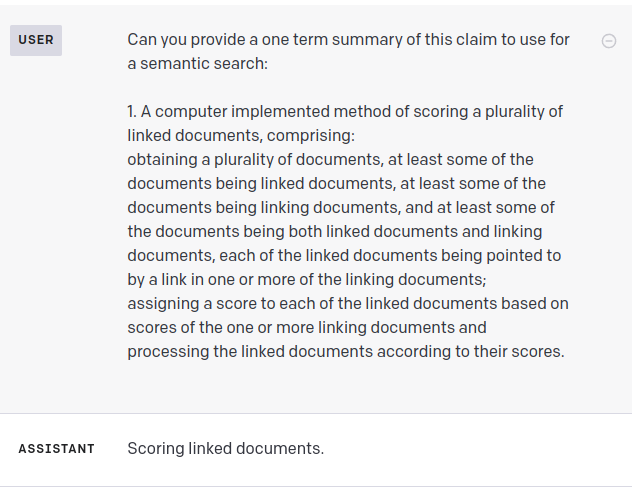

In [19]:
pr_phrase = "Scoring linked documents."
vac_phrase = "Convertible Vacuum Cleaning Device"

In [20]:
df_results_pr_title = run_similarity_query(df, query_text=pr_phrase, embedding_column="title_vector", n=20, pprint=False)

In [21]:
df_results_pr_title.head(20)

,id,url,title,text,title_vector,content_vector,vector_id,similarities
10350,36352,https://simple.wikipedia.org/wiki/Score,Score,"Score or scorer may refer to:\n\nTest score, t...","[-0.004343661013990641, -0.0018683740636333823...","[-0.020761657506227493, -0.00769726000726223, ...",10350,0.830389
12392,45747,https://simple.wikipedia.org/wiki/Hotlinking,Hotlinking,Hotlinking is an internet term. It means displ...,"[-0.03052714467048645, 0.0009924669284373522, ...","[-0.02221609093248844, 0.005765140522271395, 0...",12392,0.827505
229,445,https://simple.wikipedia.org/wiki/Link,Link,"A link, also hyperlink in computing, is a part...","[-0.001266455976292491, 0.0054137795232236385,...","[0.0020148337353020906, 0.011485341936349869, ...",229,0.821873
20078,76829,https://simple.wikipedia.org/wiki/Document,Document,A document (noun) is a piece of information th...,"[-0.00245147617533803, -0.004188503138720989, ...","[-0.017560631036758423, 0.018610380589962006, ...",20078,0.816896
17345,65756,https://simple.wikipedia.org/wiki/File%20sharing,File sharing,File sharing is the practice of making files a...,"[-0.017368802800774574, -0.007990969344973564,...","[-0.0018893101951107383, -0.008474227972328663...",17345,0.812034
17670,66818,https://simple.wikipedia.org/wiki/Documentation,Documentation,Documentation is something that people read fo...,"[0.0007255315431393683, -0.004627575166523457,...","[-0.004346046596765518, 0.035560887306928635, ...",17670,0.805454
12724,46853,https://simple.wikipedia.org/wiki/Link%20%28un...,Link (unit),"A link, also called a Gunter’s link, was a uni...","[0.001545915030874312, -0.0099473362788558, 0....","[0.009057103656232357, 0.026858096942305565, 0...",12724,0.800991
18560,69572,https://simple.wikipedia.org/wiki/Metlink,Metlink,This article is about the Melbourne public tra...,"[-0.013815443031489849, -0.020228303968906403,...","[-0.01211064774543047, -0.0005003339610993862,...",18560,0.799482
17921,67524,https://simple.wikipedia.org/wiki/Interlinear%...,Interlinear text,Interlinear text is text on several lines wher...,"[-0.024546630680561066, 0.0012778970412909985,...","[-0.014414623379707336, 0.016616856679320335, ...",17921,0.796280
21953,83588,https://simple.wikipedia.org/wiki/Scrabble,Scrabble,"Scrabble is a game that is played by 2, 3 or 4...","[-0.021461816504597664, -0.021036703139543533,...","[-0.013458753004670143, -0.022340290248394012,...",21953,0.794600


In [22]:
df_results_vac_title = run_similarity_query(df, query_text=vac_phrase, embedding_column="title_vector", n=20, pprint=False)
df_results_vac_title.head(20)

,id,url,title,text,title_vector,content_vector,vector_id,similarities
16287,62643,https://simple.wikipedia.org/wiki/Vacuum%20cle...,Vacuum cleaner,A vacuum cleaner is a device that cleans dust ...,"[-0.012701351195573807, -0.0033276129979640245...","[-0.015313845127820969, 0.02101406827569008, 0...",16287,0.927592
3631,11026,https://simple.wikipedia.org/wiki/Vacuum,Vacuum,"A vacuum is a place where there is no matter, ...","[-0.008425381034612656, -0.005103836767375469,...","[0.00443929573521018, 0.015256890095770359, 0....",3631,0.883577
17250,65301,https://simple.wikipedia.org/wiki/Aspirator,Aspirator,"An aspirator is a device that makes vacuum, be...","[-0.04094366729259491, 0.004380113445222378, 0...","[-0.030932700261473656, 0.024010788649320602, ...",17250,0.862316
5467,17816,https://simple.wikipedia.org/wiki/Cleaner,Cleaner,A cleaner (or janitor) is someone who takes aw...,"[0.0015478025889024138, 0.011390740983188152, ...","[0.012202282436192036, -0.004150776658207178, ...",5467,0.851497
969,3861,https://simple.wikipedia.org/wiki/Plunger,Plunger,A plunger is a tool. It is used to get rid of ...,"[-0.03056960366666317, -0.0057854317128658295,...","[-0.01968190260231495, 0.004058258142322302, 0...",969,0.832997
2880,9132,https://simple.wikipedia.org/wiki/Vacuum%20tube,Vacuum tube,"A vacuum tube, also called a valve in British ...","[-0.03330550342798233, -0.020121531561017036, ...","[-0.021442264318466187, 0.002115106675773859, ...",2880,0.832696
11843,43405,https://simple.wikipedia.org/wiki/Washing%20ma...,Washing machine,A washing machine is a machine that washes dir...,"[-0.022537516430020332, -0.004262391943484545,...","[0.004534857347607613, 0.007109383586794138, -...",11843,0.828790
11902,43713,https://simple.wikipedia.org/wiki/Device,Device,Device could mean:\n A measuring instrument\n ...,"[-0.005852850154042244, -0.013976535759866238,...","[-0.01816241629421711, 0.010876175947487354, 0...",11902,0.828429
3908,11663,https://simple.wikipedia.org/wiki/Dishwasher,Dishwasher,The word dishwasher means either the person wh...,"[-0.013194425962865353, -0.01191733218729496, ...","[-0.009098145179450512, -0.011047747917473316,...",3908,0.826630
10072,34551,https://simple.wikipedia.org/wiki/Vending%20ma...,Vending machine,A Vending machine is an automatic machine that...,"[-0.036472171545028687, -0.02263473905622959, ...","[-0.01705070398747921, -0.0090667475014925, -0...",10072,0.825916


This provides a quicker and dirtier way of searching but the results do seem noisier and less reliable.

## Direct Wikipedia Access

We can use the simple embeddings as a first step. As a next step we can access Wikipedia directly. We can use the `wikipedia` Python library.

https://wikipedia.readthedocs.io/en/latest/quickstart.html#quickstart

It looks like we can use `title` field to query current pages...

We need to wrap the `wikipedia` method calls in a try...except just in case the page doesn't exist or there is an error in the lookup.

Interesting - library is just a wrapper for an HTML call that returns the page data using BS4.

In [23]:
import wikipedia

In [26]:
try:
    page = wikipedia.page(df_results.iloc[0]["title"])
except Exception as e:
    print(f"Error {e}")

Error "Score" may refer to: 
Test score
Bauer Radio
Score Entertainment
Score Media
Score (statistics)
Score (number)
Raw score
Score test
Scorer's function
Scoring rule
Standard score
period
Single colour reflectometry
Event score
Score (1974 film)
Score (2016 film)
Score: A Hockey Musical
sheet music
Score
Film score
Piano–vocal score
theatre music
Video game music
SCORE (software)
Score (Randy Brecker album)
Score (Paul Haslinger album)
Score (Carol Lloyd album)
Score (Duncan Mackay album)
 Score (Fugees album)
Score (Dream Theater album)
Score (2Cellos album)
Scorcher
The Score Group
Score (talk show)
Score (game)
Score (sport)
Baseball scoring
Scoring (cricket)
Herb Score
Dance score (disambiguation)
Orchestration
Point (disambiguation)
SCORE (disambiguation)
Scores (disambiguation)
The Score (disambiguation)
Score following
Scoreboard
Score bug
Scorecard (disambiguation)
Score sheet
Underscoring
incidental music


In [28]:
try:
    print(f"Getting page for {df_results.iloc[1]['title']}")
    page = wikipedia.page(df_results.iloc[1]["title"])
except Exception as e:
    print(f"Error {e}")

Getting page for Distributed computing


In [29]:
dir(page)

['_WikipediaPage__continued_query',
 '_WikipediaPage__load',
 '_WikipediaPage__title_query_param',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'categories',
 'content',
 'coordinates',
 'html',
 'images',
 'links',
 'original_title',
 'pageid',
 'parent_id',
 'references',
 'revision_id',
 'section',
 'sections',
 'summary',
 'title',
 'url']

In [33]:
print(page.content)

A distributed system is a system whose components are located on different networked computers, which communicate and coordinate their actions by passing messages to one another. Distributed computing is a field of computer science that studies distributed systems. 
The components of a distributed system interact with one another in order to achieve a common goal. Three significant challenges of distributed systems are: maintaining concurrency of components, overcoming the lack of a global clock, and managing the independent failure of components. When a component of one system fails, the entire system does not fail. Examples of distributed systems vary from SOA-based systems to massively multiplayer online games to peer-to-peer applications.
A computer program that runs within a distributed system is called  a distributed program, and distributed programming is the process of writing such programs. There are many different types of implementations for the message passing mechanism, in

In [31]:
page.sections

[]

So the sections may be unreliable.

We could write a custom parser based on the text content above.

In [32]:
page.summary

'A distributed system is a system whose components are located on different networked computers, which communicate and coordinate their actions by passing messages to one another. Distributed computing is a field of computer science that studies distributed systems. \nThe components of a distributed system interact with one another in order to achieve a common goal. Three significant challenges of distributed systems are: maintaining concurrency of components, overcoming the lack of a global clock, and managing the independent failure of components. When a component of one system fails, the entire system does not fail. Examples of distributed systems vary from SOA-based systems to massively multiplayer online games to peer-to-peer applications.\nA computer program that runs within a distributed system is called  a distributed program, and distributed programming is the process of writing such programs. There are many different types of implementations for the message passing mechanism,

In [34]:
page.references

['http://www2.cs.uregina.ca/~hamilton/courses/330/notes/distributed/distributed.html',
 'http://www.apposite-tech.com/blog/wp-content/uploads/2017/09/p66-gallager.pdf',
 'http://www.ec-securehost.com/SIAM/DT05.html',
 'http://www.theserverside.com/feature/How-big-data-and-distributed-systems-solve-traditional-scalability-problems',
 'http://web.cs.wpi.edu/~cs4513/d07/Papers/Birrell,%20Levin,%20et.%20al.,%20Grapevine.pdf',
 'http://catalogo.bne.es/uhtbin/authoritybrowse.cgi?action=display&authority_id=XX545920',
 'http://webee.technion.ac.il/~idish/sigactNews/',
 'http://webee.technion.ac.il/~idish/sigactNews/#column%2032',
 'http://www.wisdom.weizmann.ac.il/~naor/PAPERS/lcl.pdf',
 'http://uli.nli.org.il/F/?func=find-b&local_base=NLX10&find_code=UID&request=987007538304905171',
 'http://www.nethistory.info/History%20of%20the%20Internet/',
 'http://www.nethistory.info/History%20of%20the%20Internet/email.html',
 'http://id.worldcat.org/fast/906987/',
 'http://www.comp.nus.edu.sg/~rahul/al

In [35]:
page.categories

['All articles with unsourced statements',
 'Articles with BNE identifiers',
 'Articles with BNF identifiers',
 'Articles with BNFdata identifiers',
 'Articles with Curlie links',
 'Articles with FAST identifiers',
 'Articles with GND identifiers',
 'Articles with J9U identifiers',
 'Articles with LCCN identifiers',
 'Articles with SUDOC identifiers',
 'Articles with short description',
 'Articles with unsourced statements from October 2016',
 'CS1 errors: missing periodical',
 'CS1 maint: multiple names: authors list',
 'Commons category link from Wikidata',
 'Distributed computing',
 'Short description is different from Wikidata',
 'Webarchive template wayback links']

Most categories are not *technical* categories.

In [36]:
page.links

['ACM SIGACT News',
 'API',
 'ARPANET',
 'Actor model',
 'Addison–Wesley',
 'Aircraft',
 'Algorithm',
 "Amdahl's law",
 'Analysis of parallel algorithms',
 'AppScale',
 'Application checkpointing',
 'Application server',
 'Array (data structure)',
 'Asymmetric multiprocessing',
 'Ateji PX',
 'Automatic parallelization',
 'Barrier (computer science)',
 'Beowulf cluster',
 'Berkeley Open Infrastructure for Network Computing',
 'Bibcode (identifier)',
 'Bit-level parallelism',
 'BitTorrent',
 'Bitcoin network',
 'Boolean circuits',
 'Boost (C++ libraries)',
 'Bulldozer (microarchitecture)',
 'Burst buffer',
 'Byte',
 'Byzantine fault tolerance',
 'C++ AMP',
 'CUDA',
 'Cache-only memory architecture',
 'Cache coherence',
 'Cache invalidation',
 'Cambridge University Press',
 'Cellular network',
 'Chapel (programming language)',
 'Charles E. Leiserson',
 'Charm++',
 'Christos Papadimitriou',
 'Cilk',
 'CiteSeerX (identifier)',
 'Client–server model',
 'Clock synchronization',
 'Cloud comput

This could be useful - you could use this to allow ChatGPT to navigate...

In [39]:
# Playing with getting the sections by parsing the text content
import re

def parse_sections(text, level=2):
    # Base case: if there are no sections at this level, return the text
    # pattern = r'={{{}}}([^=]+)={{{}}}'.format(level)
    pattern = r'=' + '{' + str(level) + '}' + r'([^=]+)' + '=' + '{' + str(level) + '}'
    matches = list(re.finditer(pattern, text))
    if not matches:
        return text.strip()

    # Recursive case: split the text into sections and parse each one
    sections = {}
    start = 0
    for match in matches:
        # Add the section title and its content to the dictionary
        title = match.group(1).strip()
        end = match.start()
        sections[title] = parse_sections(text[start:end], level + 1)

        # Update the start of the next section
        start = match.end()

    # Don't forget the last section
    sections[title] = parse_sections(text[start:], level + 1)

    return sections

In [57]:
import re

def parse_sections(text, level=2):
    # Base case: if there are no sections at this level, return the text
    pattern = r'^=' + '{' + str(level) + '}' + r'([^=]+)' + '=' + '{' + str(level) + '}$'
    matches = list(re.finditer(pattern, text, re.MULTILINE))
    if not matches:
        return text.strip()

    # Recursive case: split the text into sections and parse each one
    sections = {}
    last_title = None
    start = 0
    for match in matches:
        # Add the previous section (if any) to the dictionary
        if last_title is not None:
            end = match.start()
            sections[last_title] = parse_sections(text[start:end], level + 1)

        # Update the title and start for the next section
        last_title = match.group(1).strip()
        start = match.end()

    # Don't forget the last section
    if last_title is not None:
        sections[last_title] = parse_sections(text[start:], level + 1)

    return sections

# Use the function on your text
content = '''== Examples ==...'''
sections = parse_sections(content)


In [58]:
sections = parse_sections(page.content)

In [59]:
list(sections.keys())

['Introduction',
 'Parallel and distributed computing',
 'History',
 'Architectures',
 'Applications',
 'Examples',
 'Theoretical foundations',
 'See also',
 'Notes',
 'References',
 'Further reading',
 'External links']

In [60]:
sections

{'Introduction': 'The word distributed in terms such as "distributed system", "distributed programming", and "distributed algorithm" originally referred to computer networks where individual computers were physically distributed within some geographical area. The terms are nowadays used in a much wider sense, even referring to autonomous processes that run on the same physical computer and interact with each other by message passing.While there is no single definition of a distributed system, the following defining properties are commonly used as:\n\nThere are several autonomous computational entities (computers or nodes), each of which has its own local memory.\nThe entities communicate with each other by message passing.A distributed system may have a common goal, such as solving a large computational problem; the user then perceives the collection of autonomous processors as a unit. Alternatively, each computer may have its own user with individual needs, and the purpose of the dist

In [54]:
level = 2
text = page.content
pattern = r'^=' + '{' + str(level) + '}' + r'([^=]+)' + '=' + '{' + str(level) + '}$'
matches = list(re.finditer(pattern, text, re.MULTILINE))
print(matches)

[<re.Match object; span=(1330, 1348), match='== Introduction =='>, <re.Match object; span=(2943, 2983), match='== Parallel and distributed computing =='>, <re.Match object; span=(5047, 5060), match='== History =='>, <re.Match object; span=(6214, 6233), match='== Architectures =='>, <re.Match object; span=(8506, 8524), match='== Applications =='>, <re.Match object; span=(9468, 9482), match='== Examples =='>, <re.Match object; span=(10386, 10415), match='== Theoretical foundations =='>, <re.Match object; span=(22973, 22987), match='== See also =='>, <re.Match object; span=(22990, 23001), match='== Notes =='>, <re.Match object; span=(23004, 23020), match='== References =='>, <re.Match object; span=(23023, 23044), match='== Further reading =='>, <re.Match object; span=(23047, 23067), match='== External links =='>]


In [53]:
pattern

'\\S={2}([^=]+)={2}\\S'

In [55]:
level = 3
pattern = r'^=' + '{' + str(level) + '}' + r'([^=]+)' + '=' + '{' + str(level) + '}$'
matches = list(re.finditer(pattern, text, re.MULTILINE))
print(matches)

[<re.Match object; span=(10418, 10432), match='=== Models ==='>, <re.Match object; span=(14135, 14153), match='=== An example ==='>, <re.Match object; span=(16060, 16087), match='=== Complexity measures ==='>, <re.Match object; span=(18712, 18734), match='=== Other problems ==='>, <re.Match object; span=(19793, 19809), match='=== Election ==='>, <re.Match object; span=(21870, 21911), match='=== Properties of distributed systems ==='>]


In [56]:
level = 4
pattern = r'^=' + '{' + str(level) + '}' + r'([^=]+)' + '=' + '{' + str(level) + '}$'
matches = list(re.finditer(pattern, text, re.MULTILINE))
print(matches)

[]


In [62]:
def print_dict(d, indent=0):
    for key, value in d.items():
        print('  ' * indent + str(key))
        if isinstance(value, dict):
            print_dict(value, indent + 1)
        else:
            print('  ' * (indent + 1) + str(value[:100]) + '...')  # print the first 100 characters

# Use the function on your sections dictionary
print_dict(sections)

Introduction
  The word distributed in terms such as "distributed system", "distributed programming", and "distribu...
Parallel and distributed computing
  Distributed systems are groups of networked computers which share a common goal for their work.
The ...
History
  The use of concurrent processes which communicate through message-passing has its roots in operating...
Architectures
  Various hardware and software architectures are used for distributed computing. At a lower level, it...
Applications
  Reasons for using distributed systems and distributed computing may include:

The very nature of an ...
Examples
  Examples of distributed systems and applications of distributed computing include the following:
tel...
Theoretical foundations
  Models
    Many tasks that we would like to automate by using a computer are of question–answer type: we would ...
  An example
    Consider the computational problem of finding a coloring of a given graph G. Different fields might ...
  Complexi

## TODO

* Use the ChatGPT chat interface to evaluate the top N vector hits - based on a page summary.
* Get the top M hits based on summary relevance - get the sections - ask ChatGPT what sections might also be relevant.
    * Get the text for each section.
    * Check length - if too long, see if there are subsections and iterate recursively.
    * Ask specific query regarding obtained text.
    * Store as part of a context.
